In [1]:
import pandas as pd

# Load the cleaned cycling activities file
df = pd.read_csv("activities_cleaned.csv")

# Show the first 5 rows of the dataset
df.head()


,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Perceived Relative Effort,Commute.1,From Upload,Grade Adjusted Distance,Bike,Gear,Flagged,Average Elapsed Speed,Dirt Distance,Total Steps
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Display all column names in the dataset
df.columns.tolist()


['Activity ID',
 'Activity Date',
 'Activity Name',
 'Activity Type',
 'Elapsed Time',
 'Distance',
 'Max Heart Rate',
 'Relative Effort',
 'Commute',
 'Activity Gear',
 'Filename',
 'Athlete Weight',
 'Bike Weight',
 'Elapsed Time.1',
 'Moving Time',
 'Distance.1',
 'Max Speed',
 'Average Speed',
 'Elevation Gain',
 'Elevation Loss',
 'Elevation Low',
 'Elevation High',
 'Max Grade',
 'Average Grade',
 'Max Cadence',
 'Average Cadence',
 'Max Heart Rate.1',
 'Average Heart Rate',
 'Average Watts',
 'Calories',
 'Average Temperature',
 'Relative Effort.1',
 'Total Work',
 'Perceived Exertion',
 'Weighted Average Power',
 'Power Count',
 'Prefer Perceived Exertion',
 'Perceived Relative Effort',
 'Commute.1',
 'From Upload',
 'Grade Adjusted Distance',
 'Bike',
 'Gear',
 'Flagged',
 'Average Elapsed Speed',
 'Dirt Distance',
 'Total Steps']

In [3]:
# Define a function to classify terrain
def classify_terrain(speed):
    if speed >= 25:
        return 'Flat'
    elif speed >= 18:
        return 'Moderate'
    else:
        return 'Hilly'

# Apply the classification
df['Terrain Type'] = df['Average Speed'].apply(classify_terrain)

# Preview with the new column
df[['Average Speed', 'Terrain Type']].head()


,Average Speed,Terrain Type
0,5.989,Hilly
1,6.343,Hilly
2,5.800,Hilly
3,5.697,Hilly
4,5.657,Hilly


In [4]:
# Keep only the relevant columns
analysis_df = df[['Average Cadence', 'Elevation Gain', 'Terrain Type']].copy()

# Drop any rows with missing values
analysis_df.dropna(inplace=True)

# Preview cleaned data
analysis_df.head()


,Average Cadence,Elevation Gain,Terrain Type
0,58.991146,126.0,Hilly
1,59.968704,89.0,Hilly
2,58.758060,186.0,Hilly
3,59.988571,244.0,Hilly
4,57.603649,195.0,Hilly


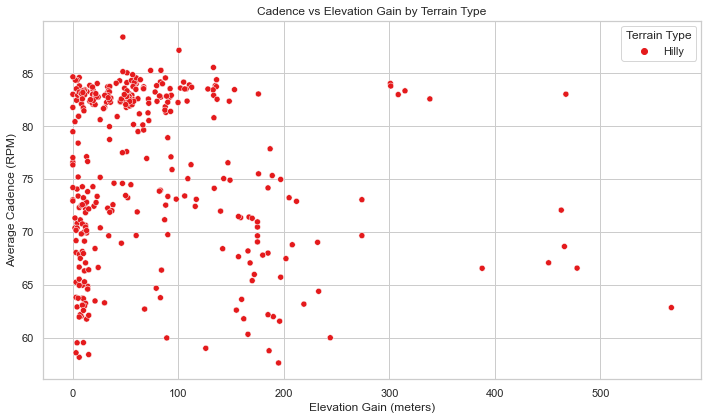

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=analysis_df, 
                x='Elevation Gain', 
                y='Average Cadence', 
                hue='Terrain Type',
                palette='Set1')

# Add labels and title
plt.title('Cadence vs Elevation Gain by Terrain Type')
plt.xlabel('Elevation Gain (meters)')
plt.ylabel('Average Cadence (RPM)')
plt.legend(title='Terrain Type')
plt.tight_layout()
plt.show()


In [6]:
# Overall correlation
overall_corr = analysis_df['Average Cadence'].corr(analysis_df['Elevation Gain'])
print(f"Overall Pearson Correlation (Cadence vs Elevation): {overall_corr:.3f}")

# Correlation by terrain type
terrain_corr = analysis_df.groupby('Terrain Type')[
    ['Average Cadence', 'Elevation Gain']
].corr().iloc[0::2, -1].reset_index()

# Display correlation results
terrain_corr.rename(columns={'Elevation Gain': 'Correlation'}, inplace=True)
print("\nCorrelation by Terrain Type:")
print(terrain_corr[['Terrain Type', 'Correlation']])


Overall Pearson Correlation (Cadence vs Elevation): -0.132

Correlation by Terrain Type:
  Terrain Type  Correlation
0        Hilly    -0.132026


In [8]:
# Load the extended dataset
df_ext = pd.read_csv("extended_activities_with_ftp.csv")

# Display its columns to confirm it includes the same ones we need
df_ext.columns.tolist()


['Activity Date',
 'Elapsed Time',
 'Distance',
 'Max Heart Rate',
 'Relative Effort',
 'Athlete Weight',
 'Bike Weight',
 'Moving Time',
 'Max Speed',
 'Average Speed',
 'Elevation Gain',
 'Elevation Loss',
 'Elevation Low',
 'Elevation High',
 'Max Grade',
 'Average Grade',
 'Max Cadence',
 'Average Cadence',
 'Average Heart Rate',
 'Average Watts',
 'Calories',
 'Average Temperature',
 'Total Work',
 'Perceived Exertion',
 'Weighted Average Power',
 'Power Count',
 'Prefer Perceived Exertion',
 'Perceived Relative Effort',
 'Grade Adjusted Distance',
 'Average Elapsed Speed',
 '60 Day Maximum Power 5s',
 '60 Day Maximum Power 10s',
 '60 Day Maximum Power 30s',
 '60 Day Maximum Power 1.0min',
 '60 Day Maximum Power 5.0min',
 '60 Day Maximum Power 10.0min',
 '60 Day Maximum Power 20.0min',
 '60 Day Maximum Power 30.0min',
 '60 Day Maximum Power 1.0 hr',
 '60 Day Maximum Power 1.5 hr',
 '60 Day Maximum Power 2.0 hr',
 'FTP']

In [9]:
# Keep only the relevant columns
df_ext_clean = df_ext[['Average Cadence', 'Elevation Gain', 'Average Speed']].copy()

# Drop rows with missing values
df_ext_clean.dropna(inplace=True)

# Reuse terrain classification function
df_ext_clean['Terrain Type'] = df_ext_clean['Average Speed'].apply(classify_terrain)

# Preview cleaned extended dataset
df_ext_clean.head()


,Average Cadence,Elevation Gain,Average Speed,Terrain Type
0,58.991146,126.0,5.989,Hilly
1,59.968704,89.0,6.343,Hilly
2,58.758060,186.0,5.800,Hilly
3,59.988571,244.0,5.697,Hilly
4,57.603649,195.0,5.657,Hilly


Hilly    524
Name: Terrain Type, dtype: int64


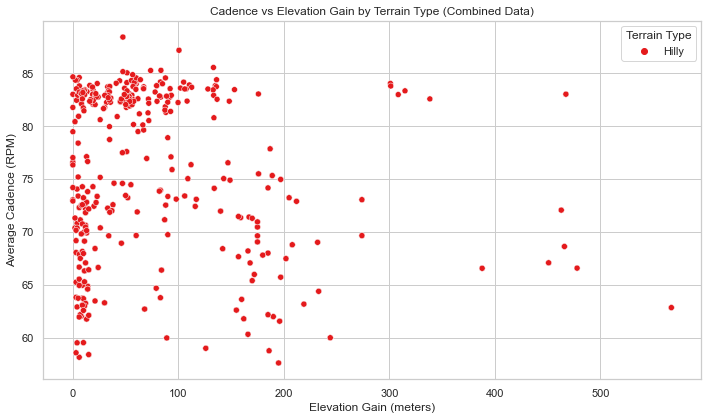

In [10]:
# Drop Average Speed column to match original analysis_df structure
df_ext_clean = df_ext_clean.drop(columns=['Average Speed'])

# Merge both datasets
combined_df = pd.concat([analysis_df, df_ext_clean], ignore_index=True)

# Confirm how many terrain types are now present
print(combined_df['Terrain Type'].value_counts())

# Plot the updated scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df,
                x='Elevation Gain',
                y='Average Cadence',
                hue='Terrain Type',
                palette='Set1')

plt.title('Cadence vs Elevation Gain by Terrain Type (Combined Data)')
plt.xlabel('Elevation Gain (meters)')
plt.ylabel('Average Cadence (RPM)')
plt.legend(title='Terrain Type')
plt.tight_layout()
plt.show()


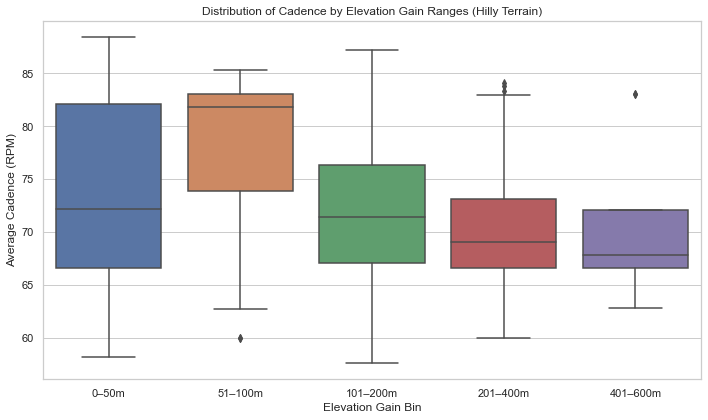

In [11]:
# Create elevation bins
combined_df['Elevation Bin'] = pd.cut(combined_df['Elevation Gain'], bins=[0, 50, 100, 200, 400, 600], 
                                       labels=['0–50m', '51–100m', '101–200m', '201–400m', '401–600m'])

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Elevation Bin', y='Average Cadence')
plt.title('Distribution of Cadence by Elevation Gain Ranges (Hilly Terrain)')
plt.xlabel('Elevation Gain Bin')
plt.ylabel('Average Cadence (RPM)')
plt.tight_layout()
plt.show()


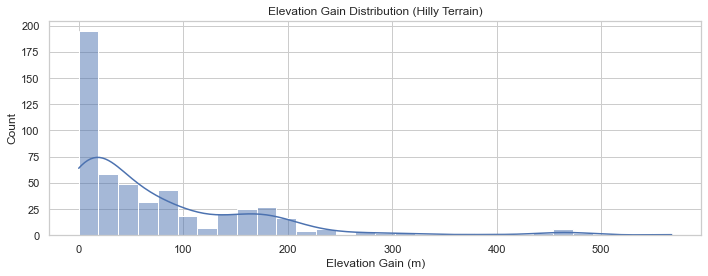

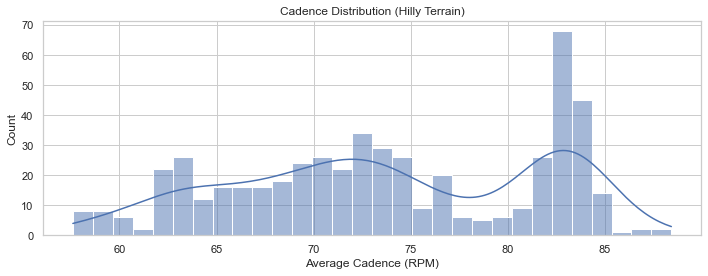

In [12]:
# Histogram of elevation gain
plt.figure(figsize=(10, 4))
sns.histplot(combined_df['Elevation Gain'], bins=30, kde=True)
plt.title('Elevation Gain Distribution (Hilly Terrain)')
plt.xlabel('Elevation Gain (m)')
plt.tight_layout()
plt.show()

# Histogram of cadence
plt.figure(figsize=(10, 4))
sns.histplot(combined_df['Average Cadence'], bins=30, kde=True)
plt.title('Cadence Distribution (Hilly Terrain)')
plt.xlabel('Average Cadence (RPM)')
plt.tight_layout()
plt.show()


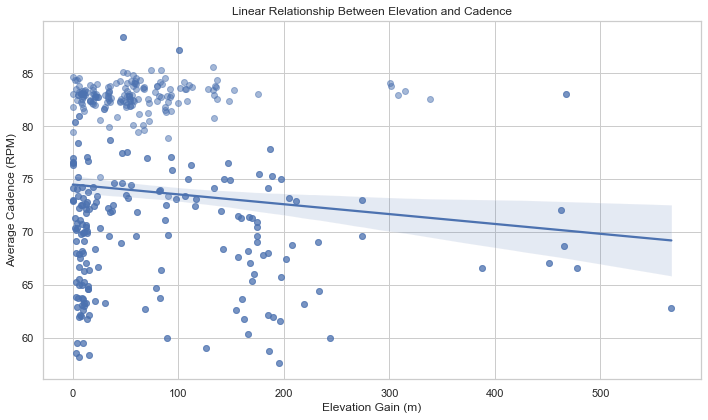

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(data=combined_df, x='Elevation Gain', y='Average Cadence', scatter_kws={'alpha':0.5})
plt.title('Linear Relationship Between Elevation and Cadence')
plt.xlabel('Elevation Gain (m)')
plt.ylabel('Average Cadence (RPM)')
plt.tight_layout()
plt.show()
